### Import Libraries and Data

In [1]:
# Basic imports
import sys
from pathlib import Path
import os
import warnings

warnings.filterwarnings("ignore")

project_root = Path().resolve().parent
sys.path.append(str(project_root))

In [2]:
os.chdir('/Users/riyanshibohra/Documents/GitHub/metropolitan-climate-profiling')
print(os.getcwd())  # Verify the change

/Users/riyanshibohra/Documents/GitHub/metropolitan-climate-profiling


In [3]:
# Import necessary modules
from scripts.data_loader import load_dataset

from scripts.eda import (
    generate_summary_statistics,
    plot_histograms,
    plot_boxplots,
    plot_time_series,
    plot_correlation_heatmap,
    plot_day_night_temperature,
    plot_monthly_avg_temp_drop,
    plot_seasonal_humidity_variation
)

In [4]:
# Define paths to processed data

data_folder = Path().resolve() / "data"
processed_dallas_path = data_folder / "processed_dallas"
processed_arlington_path = data_folder / "processed_arlington"
processed_denton_path = data_folder / "processed_denton"

In [5]:
# Load processed datasets

print("Loading processed datasets...")
dallas = load_dataset(processed_dallas_path)
arlington = load_dataset(processed_arlington_path)
denton = load_dataset(processed_denton_path)

Loading processed datasets...


### Basic Statistical Analysis


In [6]:
# Generate summary statistics

print("Generating summary statistics...")
generate_summary_statistics(dallas)

Generating summary statistics...
       HourlyDryBulbTemperature  HourlyWetBulbTemperature  \
count              10518.000000              10518.000000   
mean                  67.293170                 58.417849   
std                   18.483267                 15.171961   
min                   16.000000                 13.000000   
25%                   55.000000                 48.000000   
50%                   69.000000                 61.000000   
75%                   81.000000                 72.000000   
max                  107.000000                 81.000000   

       HourlyDewPointTemperature  HourlyRelativeHumidity  HourlyPrecipitation  \
count               10518.000000            10518.000000         10518.000000   
mean                   51.487883               61.368897             0.013694   
std                    17.504902               21.307718             0.073928   
min                    -5.000000               12.000000             0.000000   
25%         

In [7]:
# Define columns of interest for visualizations

columns_of_interest = [
    'HourlyDryBulbTemperature', 'HourlyWetBulbTemperature', 'HourlyRelativeHumidity',
    'HourlyDewPointTemperature', 'HourlyPrecipitation', 'HourlyWindSpeed'
]

### Data Distribution Overview


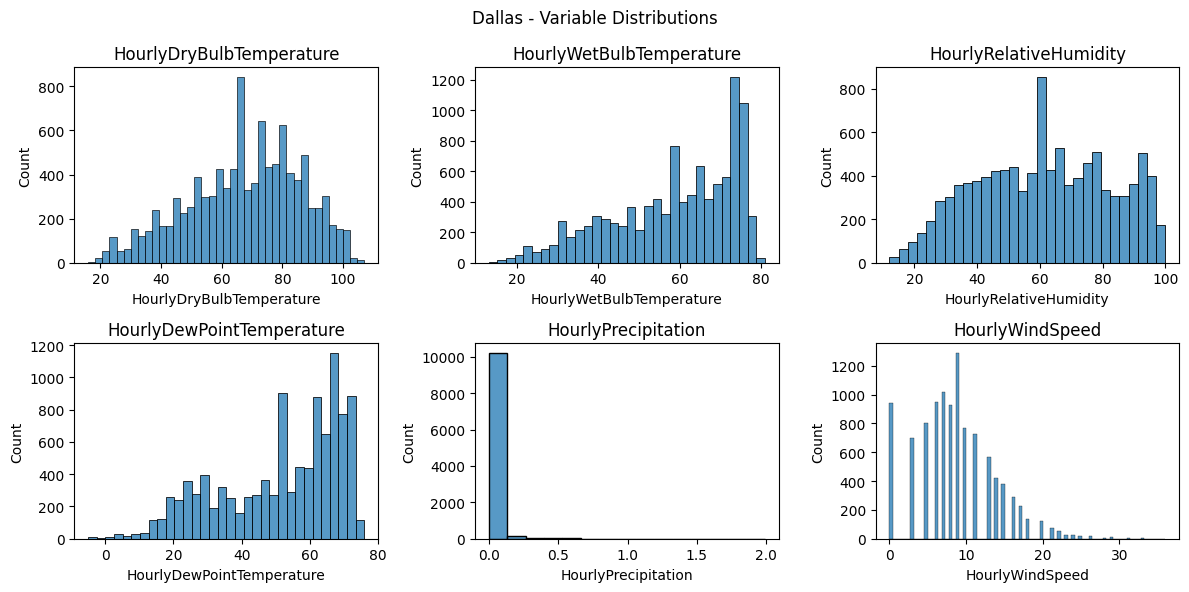

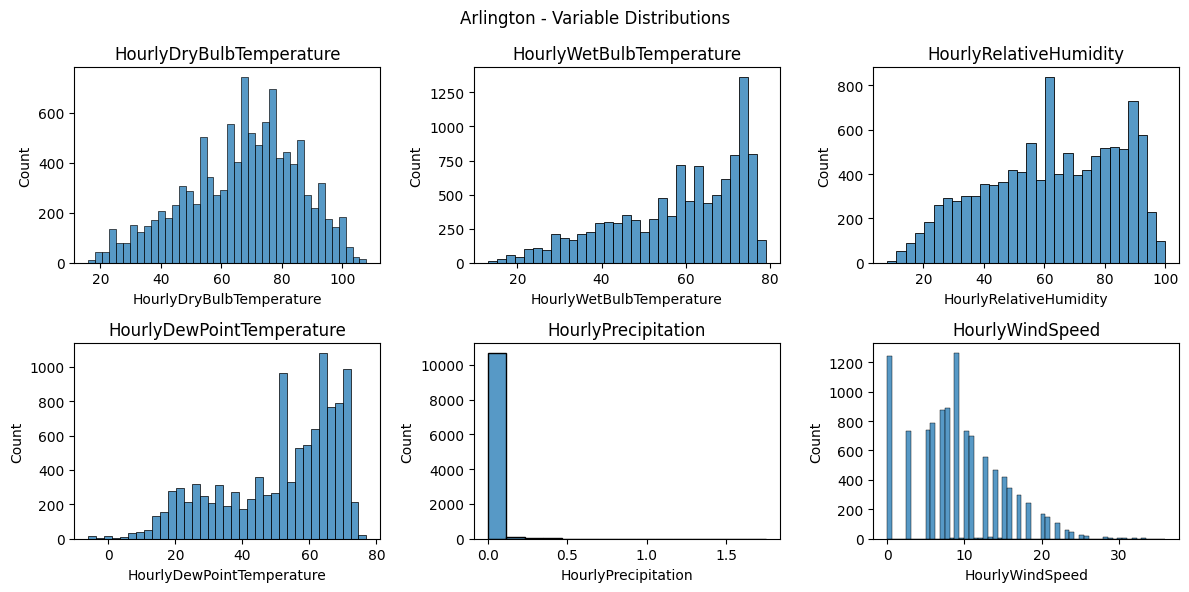

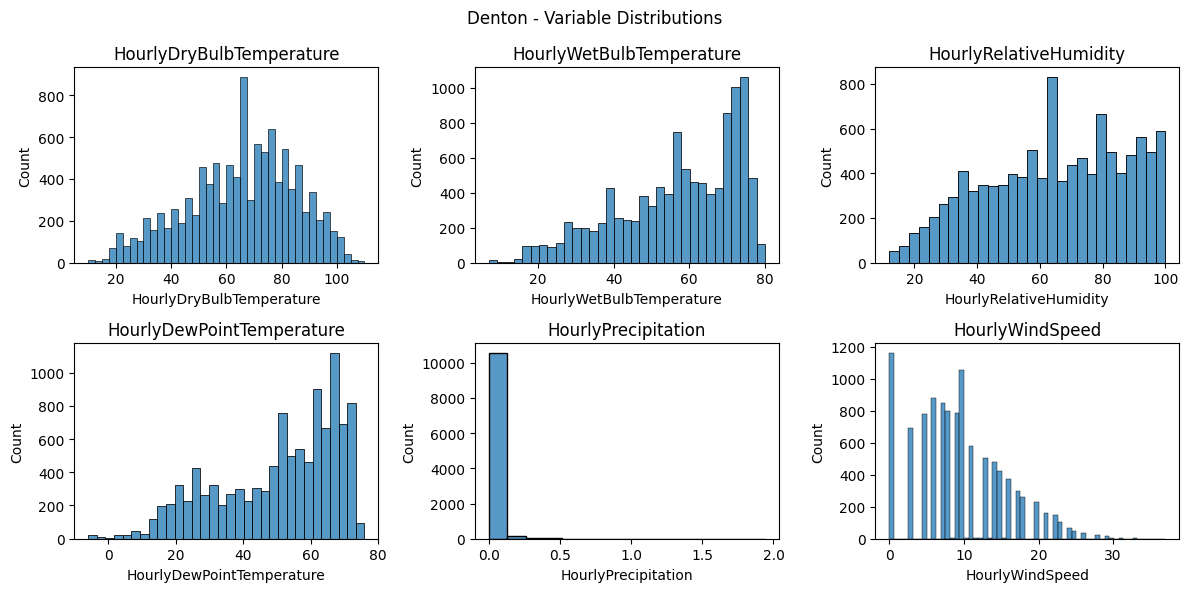

In [8]:
# Plot histograms

plot_histograms(dallas, columns_of_interest, title="Dallas - Variable Distributions")
plot_histograms(arlington, columns_of_interest, title="Arlington - Variable Distributions") 
plot_histograms(denton, columns_of_interest, title="Denton - Variable Distributions")


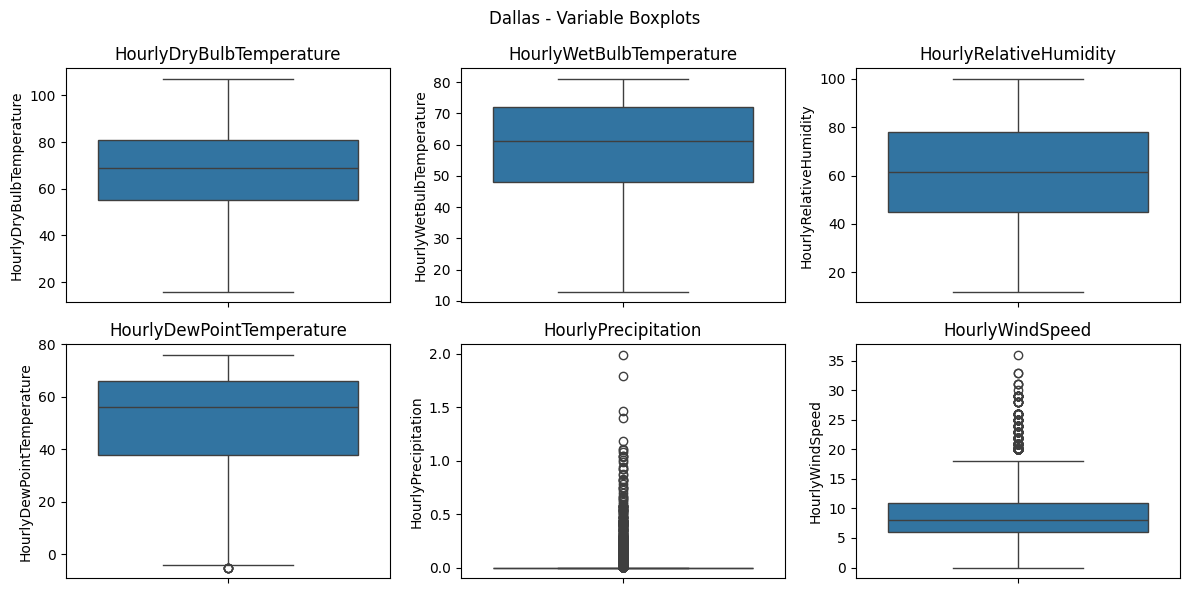

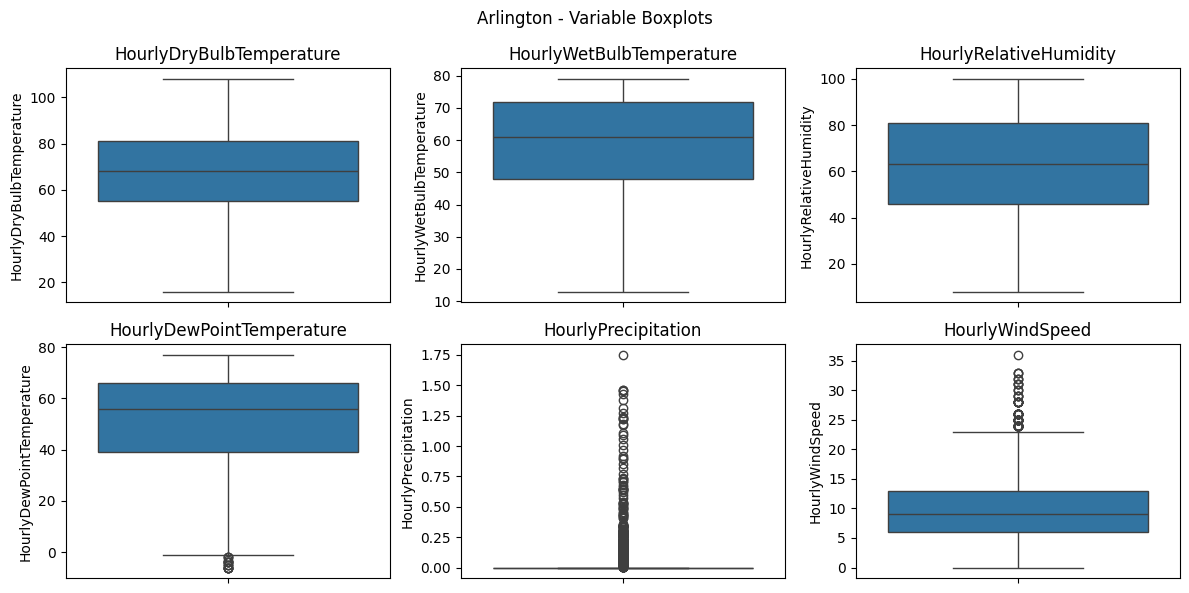

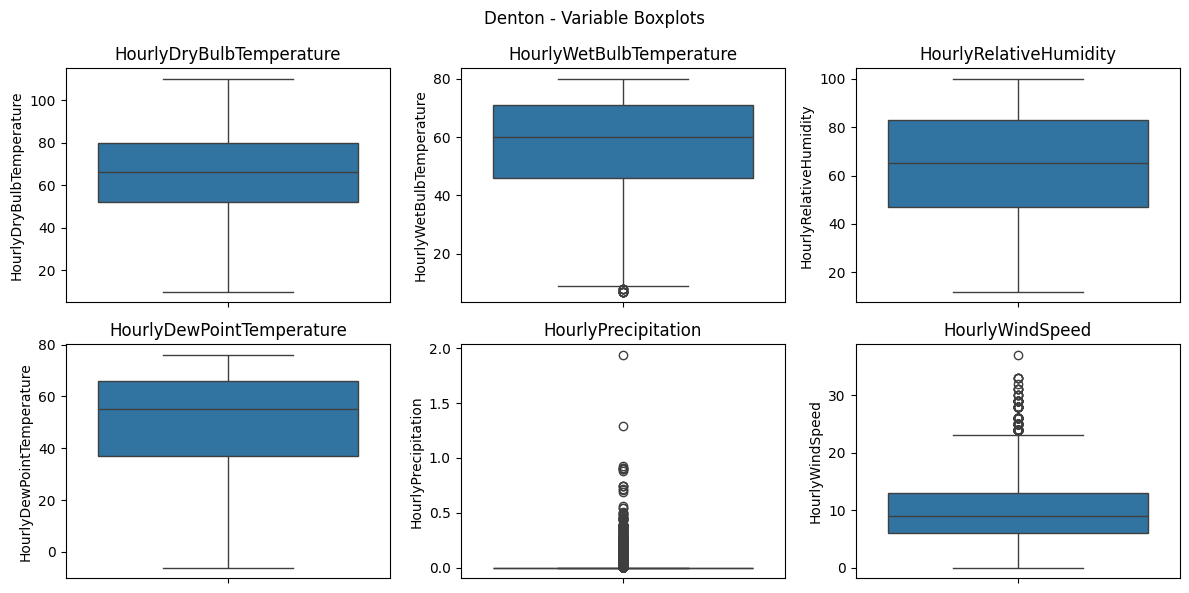

In [9]:
# Plot boxplots

plot_boxplots(dallas, columns_of_interest, title="Dallas - Variable Boxplots")
plot_boxplots(arlington, columns_of_interest, title="Arlington - Variable Boxplots")
plot_boxplots(denton, columns_of_interest, title="Denton - Variable Boxplots")

Plotting time series...


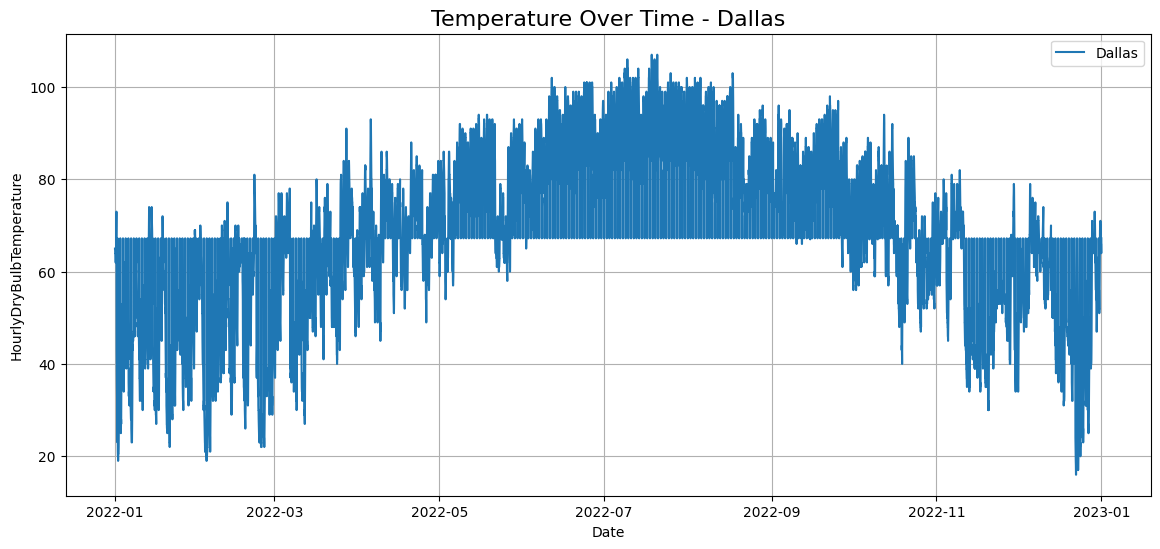

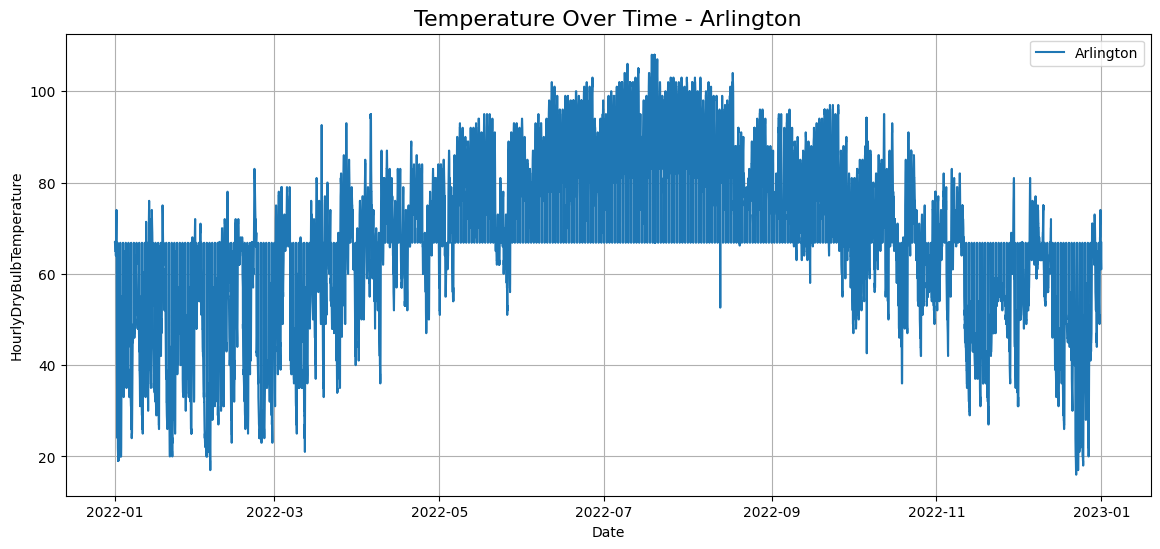

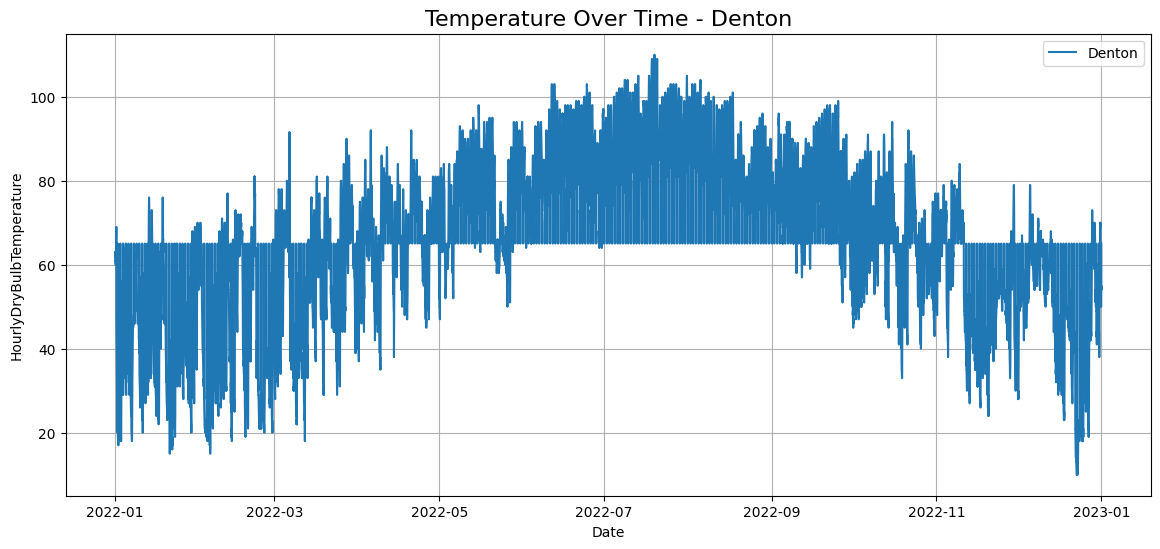

In [17]:
# Plot time series

print("Plotting time series...")
plot_time_series(dallas, date_column='DATE', value_column='HourlyDryBulbTemperature', city_name="Dallas", title="Temperature Over Time")
plot_time_series(arlington, date_column='DATE', value_column='HourlyDryBulbTemperature', city_name="Arlington", title="Temperature Over Time")
plot_time_series(denton, date_column='DATE', value_column='HourlyDryBulbTemperature', city_name="Denton", title="Temperature Over Time")

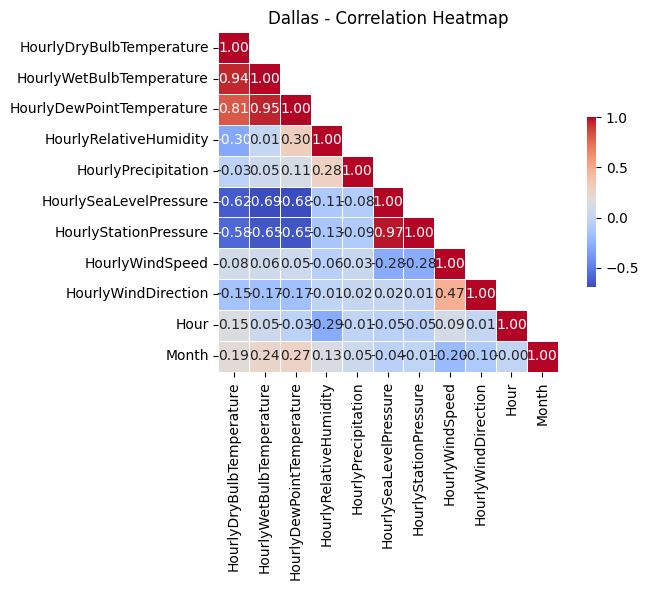

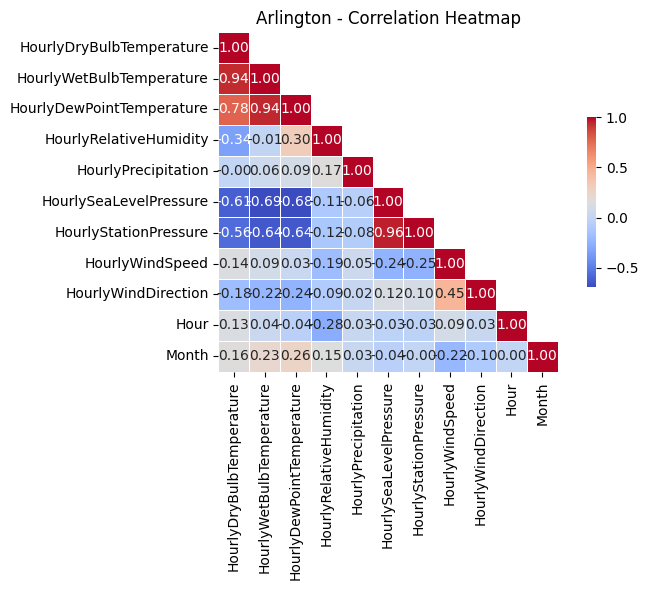

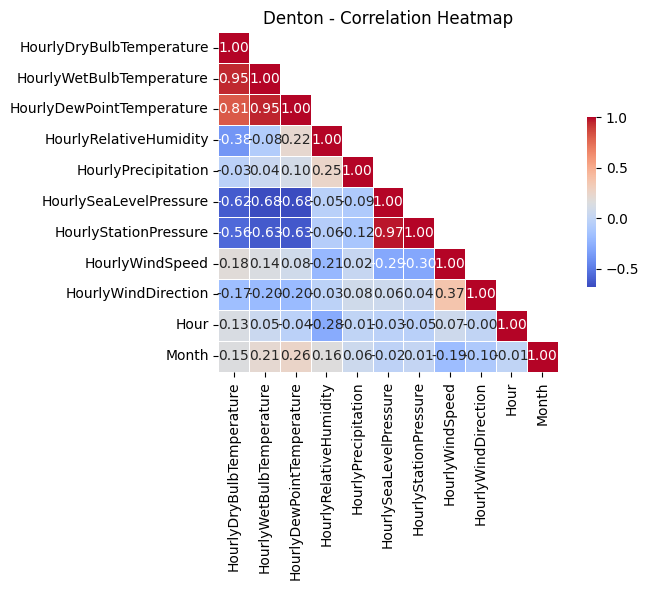

In [19]:
# Plot correlation heatmap

plot_correlation_heatmap(dallas, title="Dallas - Correlation Heatmap")
plot_correlation_heatmap(arlington, title="Arlington - Correlation Heatmap")
plot_correlation_heatmap(denton, title="Denton - Correlation Heatmap")

In [20]:
# Check the column names in Denton dataset
print("Denton Dataset Columns:", denton.columns)

# Check the column names in Dallas dataset
print("Dallas Dataset Columns:", dallas.columns)

# Check the column names in Arlington dataset
print("Arlington Dataset Columns:", arlington.columns)

Denton Dataset Columns: Index(['DATE', 'HourlyDryBulbTemperature', 'HourlyWetBulbTemperature',
       'HourlyDewPointTemperature', 'HourlyRelativeHumidity',
       'HourlyPrecipitation', 'HourlySeaLevelPressure',
       'HourlyStationPressure', 'HourlyWindSpeed', 'HourlyWindDirection',
       'Hour', 'Month', 'Season', 'Day_Night', 'Date'],
      dtype='object')
Dallas Dataset Columns: Index(['DATE', 'HourlyDryBulbTemperature', 'HourlyWetBulbTemperature',
       'HourlyDewPointTemperature', 'HourlyRelativeHumidity',
       'HourlyPrecipitation', 'HourlySeaLevelPressure',
       'HourlyStationPressure', 'HourlyWindSpeed', 'HourlyWindDirection',
       'Hour', 'Month', 'Season', 'Day_Night', 'Date'],
      dtype='object')
Arlington Dataset Columns: Index(['DATE', 'HourlyDryBulbTemperature', 'HourlyWetBulbTemperature',
       'HourlyDewPointTemperature', 'HourlyRelativeHumidity',
       'HourlyPrecipitation', 'HourlySeaLevelPressure',
       'HourlyStationPressure', 'HourlyWindSpeed', 'Ho

### Temperature Analysis


#### Day vs Night Analysis

Plotting daytime vs nighttime average temperatures...
Dallas - Day vs Night Avg Temperature:
 Day_Night
Daytime      69.776321
Nighttime    64.928024
Name: HourlyDryBulbTemperature, dtype: float64
Arlington - Day vs Night Avg Temperature:
 Day_Night
Daytime      70.321118
Nighttime    63.581621
Name: HourlyDryBulbTemperature, dtype: float64
Denton - Day vs Night Avg Temperature:
 Day_Night
Daytime      69.243833
Nighttime    61.061627
Name: HourlyDryBulbTemperature, dtype: float64


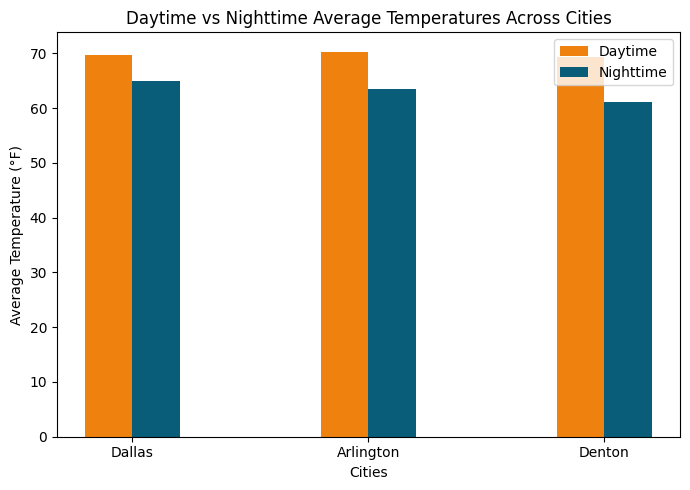

In [21]:
# Plot Day vs Night Temperatures
print("Plotting daytime vs nighttime average temperatures...")
plot_day_night_temperature(dallas, arlington, denton, temperature_column='HourlyDryBulbTemperature')

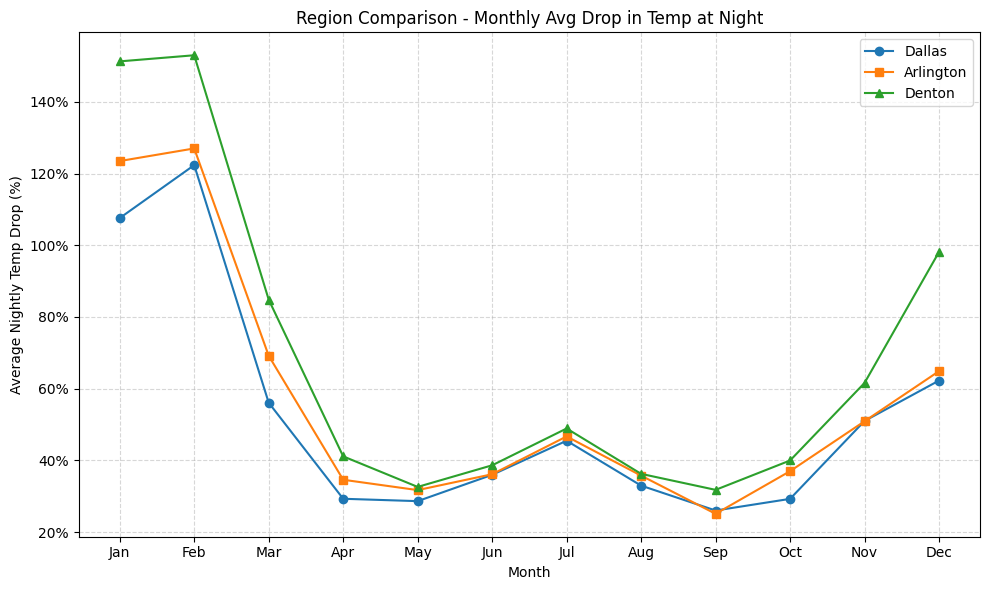

In [22]:
# Plot monthly average nightly temperature drop

plot_monthly_avg_temp_drop(dallas, arlington, denton)

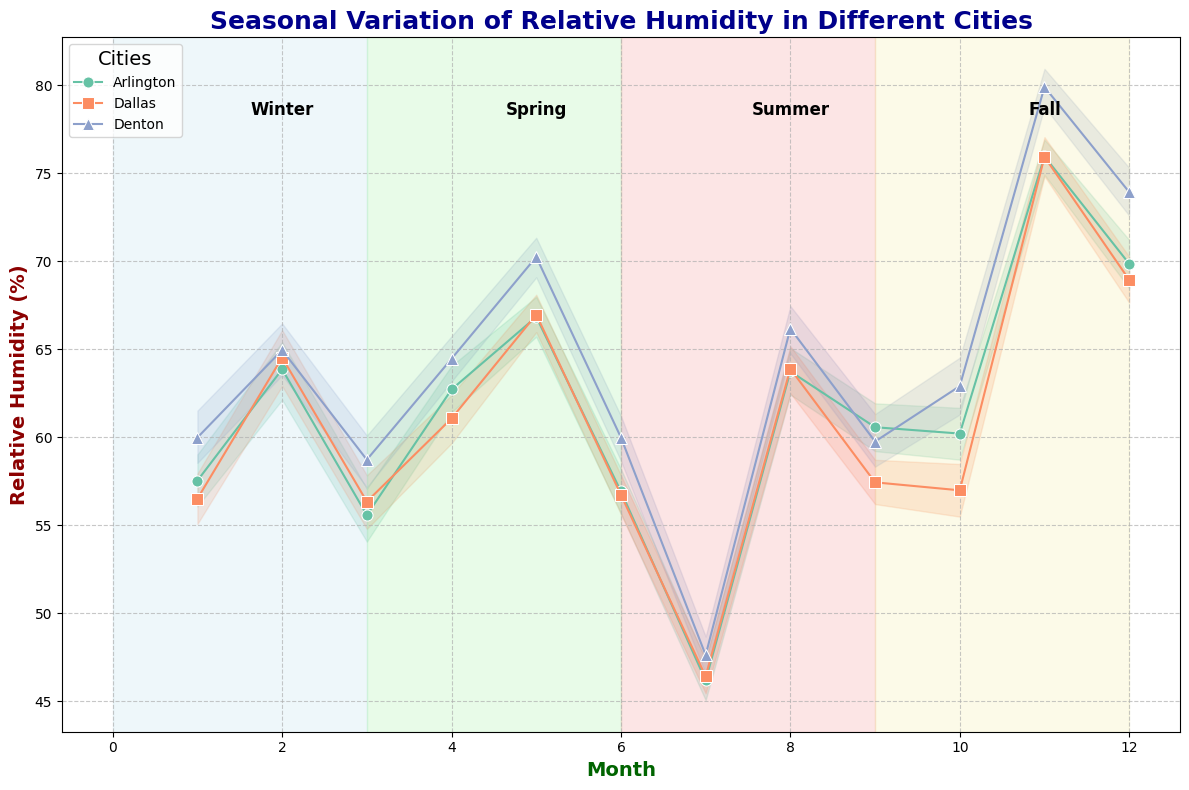

In [15]:
plot_seasonal_humidity_variation(dallas, arlington, denton)

### End of Notebook

In [23]:
print("EDA Complete!")

EDA Complete!
